# Predict Wine Quality Challenge by AIcrowd

In this competition, we are given features of white vinho verde wine and we have to predict the quality of the wine.

During evaluation, F1 score will be used to test the efficiency of the model where,
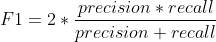

Challenge Page: https://www.aicrowd.com/challenges/wineq

Date of Creation : `June 11, 2021`

Made by: 
    
    Siddhant Pathak
    Year 2 Computer Science student
    Nanyang Technological University, Singapore

------
Reach out to me at:
    siddhant005@e.ntu.edu.sg

## Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

---

## Setup : Import the Dataset

Dataset for training to model : Attached file `Train.csv`   
This csv file contains the attributes describing the wine along with the wine quality

In [13]:
data = pd.read_csv("train.csv")

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,8.4,0.40,0.70,13.1,0.042,29.0,197.0,0.99800,3.06,0.64,9.7,5
2,7.8,0.17,0.23,1.7,0.029,39.0,128.0,0.99272,3.37,0.41,10.7,7
3,6.2,0.18,0.49,4.5,0.047,17.0,90.0,0.99190,3.27,0.37,11.6,6
4,6.5,0.26,0.24,10.8,0.042,47.0,130.0,0.99600,3.08,0.40,10.1,6


---
## Exploratory Data Analysis

Let us start by exploring the response variable `Quality`, the one we are supposed to predict at the end of the day.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 367.4 KB


In [16]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.858435,0.278051,0.334160,6.442407,0.045539,35.222818,138.300664,0.994051,3.187157,0.489377,10.507517,5.876723
std,0.835202,0.099147,0.121689,5.098740,0.020888,16.537835,42.061782,0.003004,0.149727,0.113204,1.232936,0.888392
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991753,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.275000,0.043000,34.000000,135.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,167.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.200000,9.000000


<AxesSubplot:>

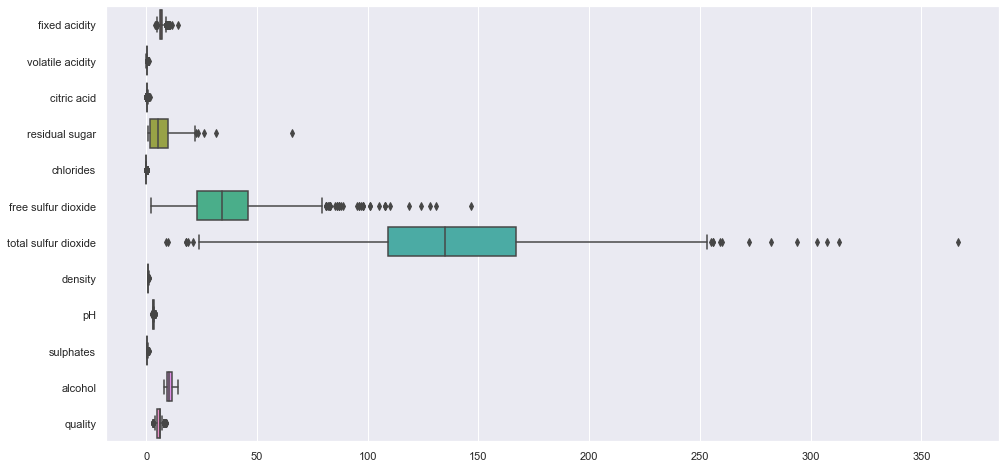

In [17]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = data, orient = "h")

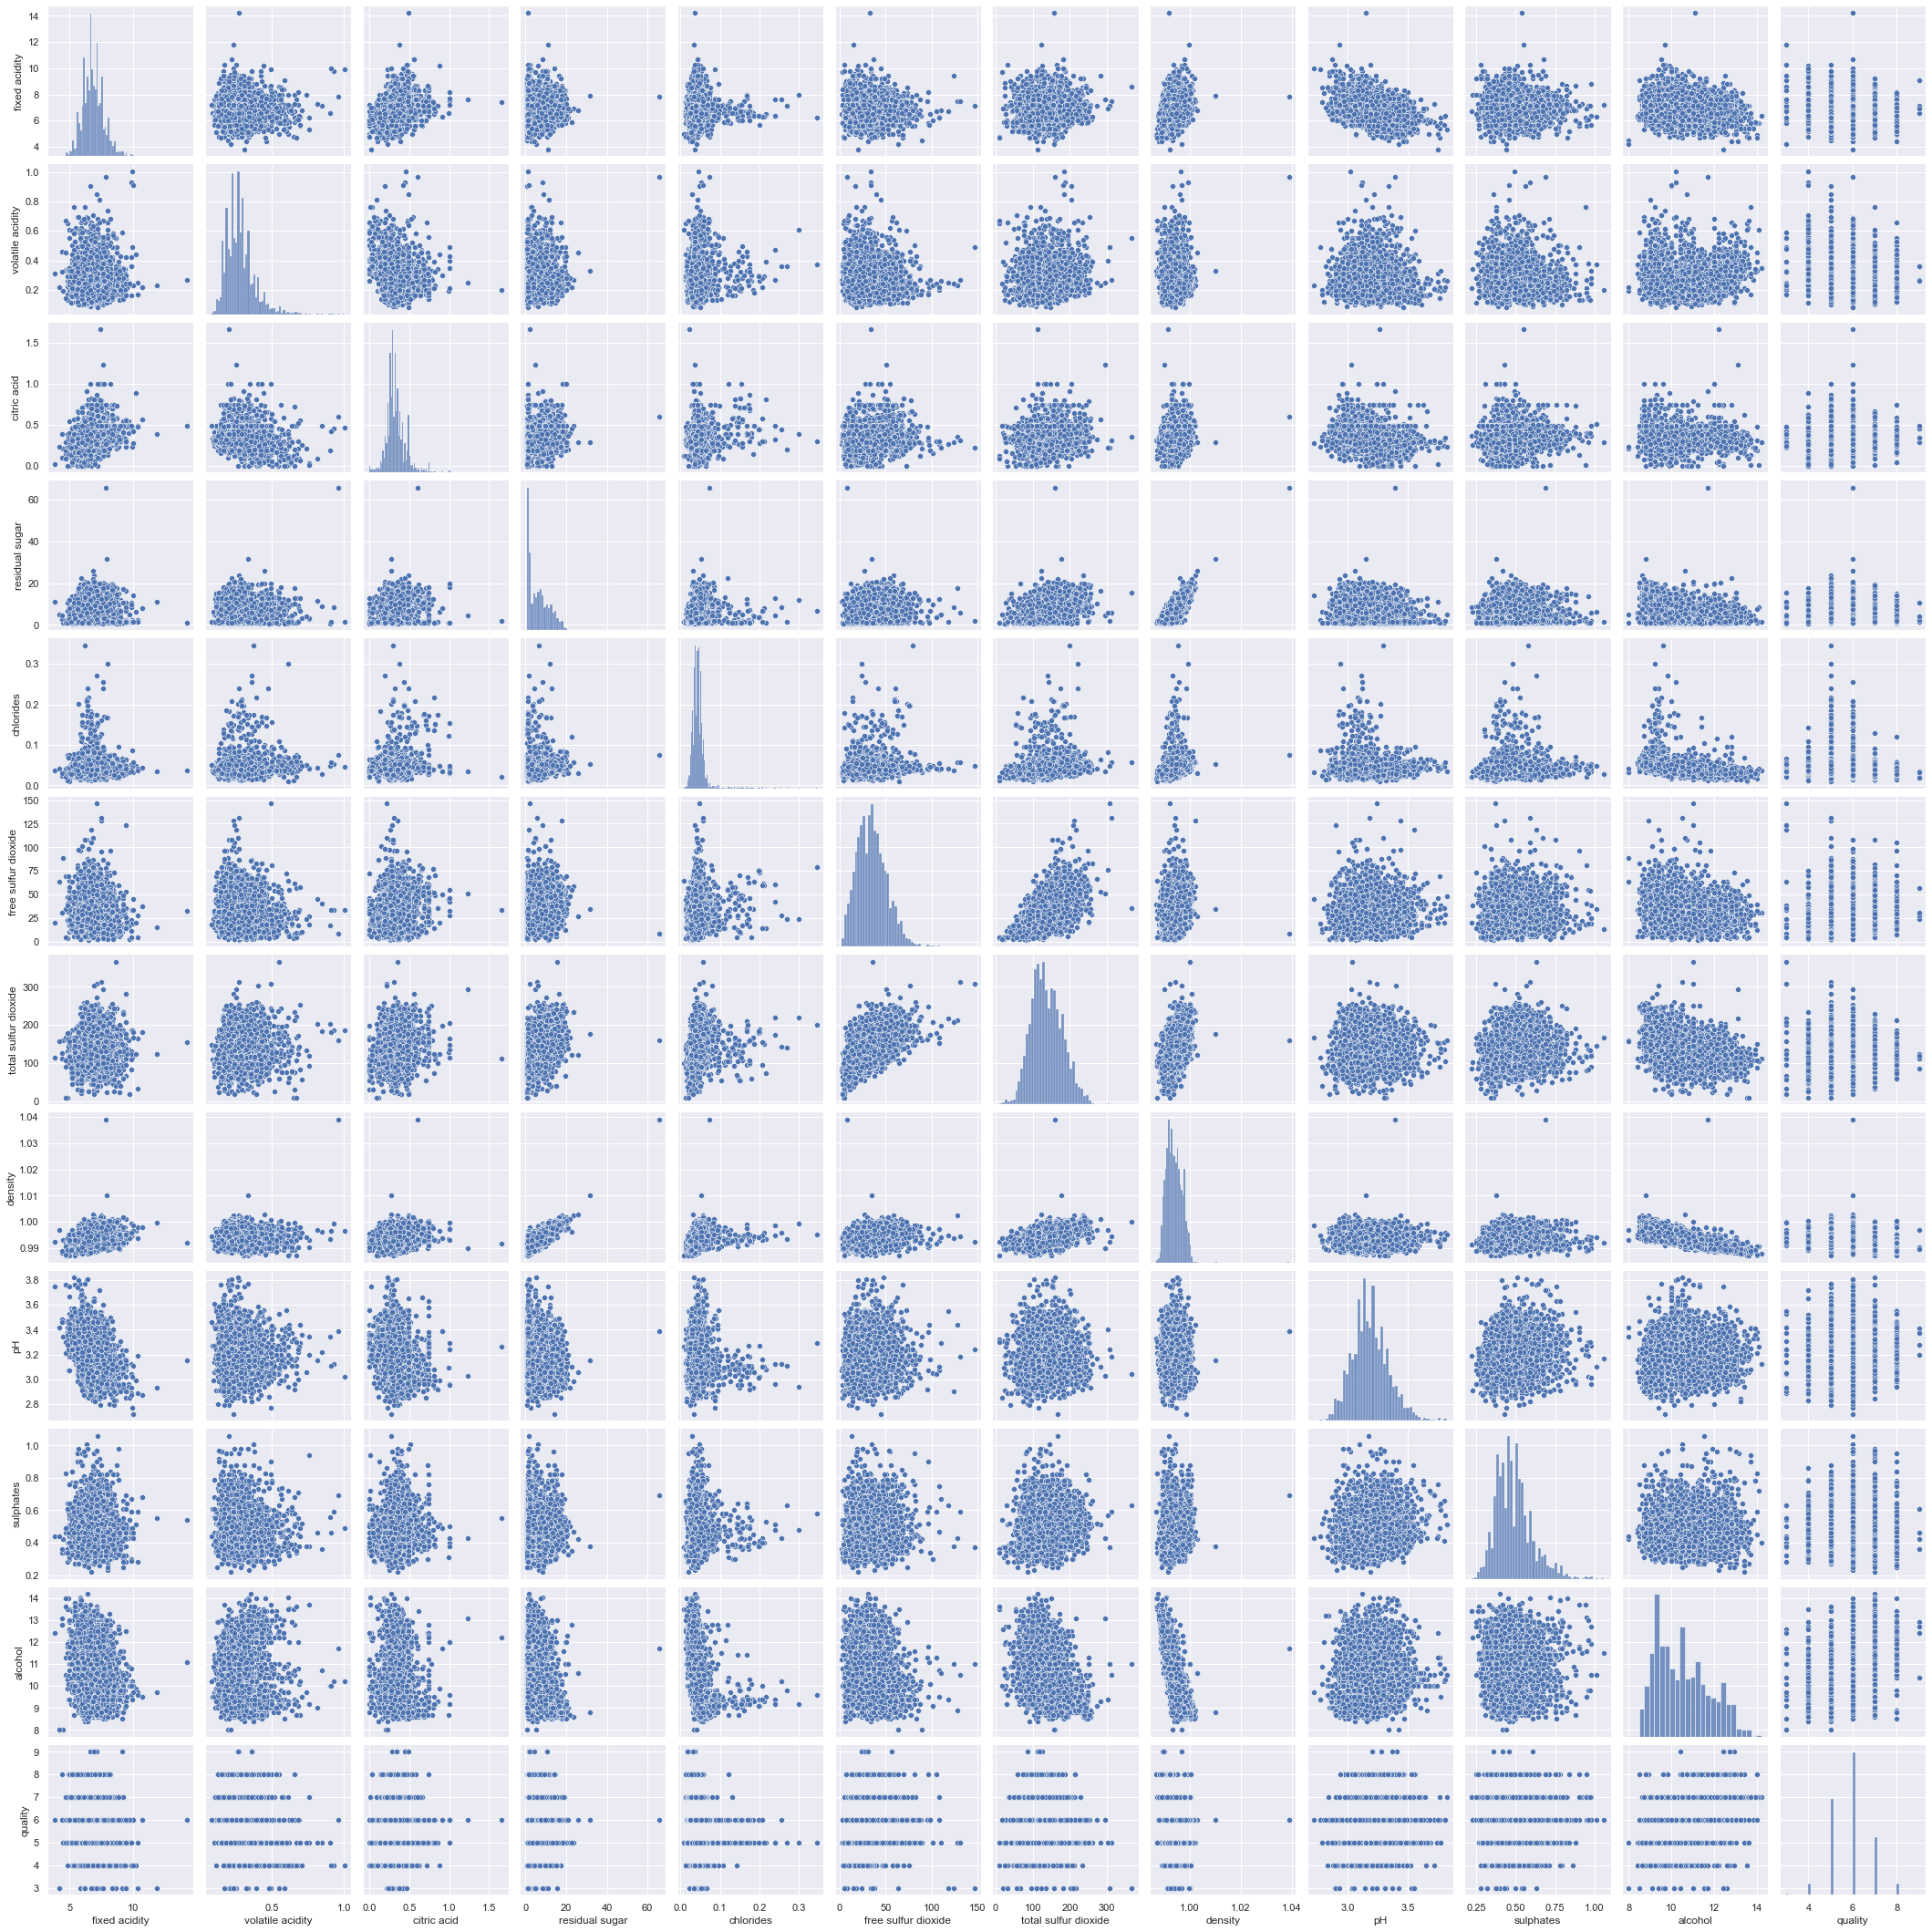

In [18]:
sb.pairplot(data = data)

<AxesSubplot:>

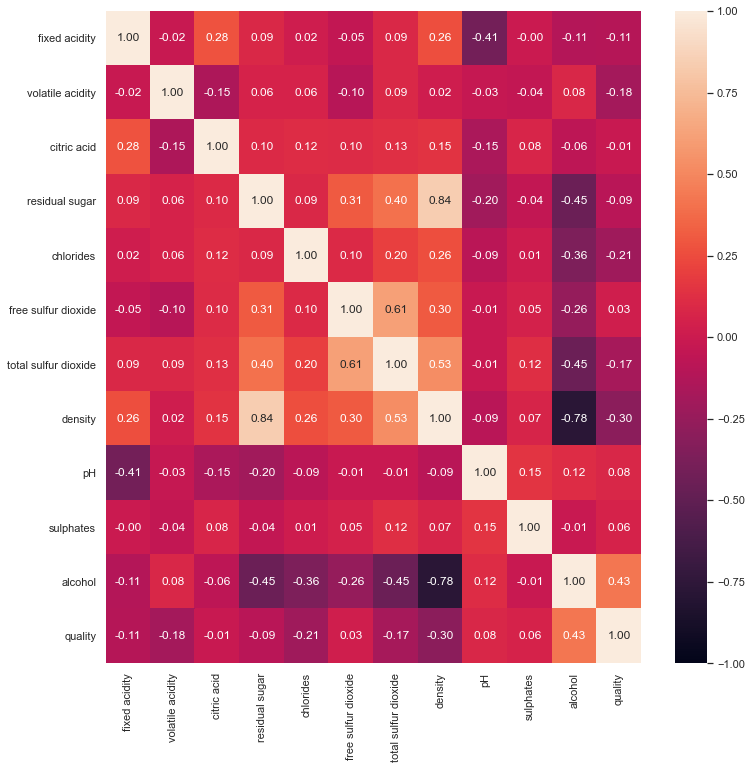

In [19]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

---
## Import the modules and packages necessary for our prediction model: Random Forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

---
## Set up the Train and Test datasets.   
Train Set with 3418 samples and Test Set with 500 samples.

In [21]:
X=pd.DataFrame(data.drop(['quality'], axis=1))
y=pd.DataFrame(data['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 500/3918, random_state=42)

---

## Hyperparameter Optimization using GridSearchCV
A basic set of tools for Cross-Validation, so that we can tune the Hyper-parameters `n_estimators` and `max_depth` of Random Forest.

In [22]:
param_grid = {'n_estimators': np.arange(100,1001,50),   # number of trees 100, 150, ..., 1000
              'max_depth': np.arange(5, 21)}             # depth of trees 5,6,7, ..., 20

hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 3,                     # 3-fold cross-validation
                      scoring = 'f1_macro')       # F1 macro averaged score to evaluate

hpGrid.fit(X_train, y_train.quality.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000])},
             scoring='f1_macro')

In [23]:
print(hpGrid.best_estimator_)

print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=15)
0.3813568244445837


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 500/3918, random_state=42)

---

## Model Fitting and Training
Now we take the optimized hyperparameters as shown, and then fit our Random Forest model, and finally train it on our training data and try it our split test data to make final assessments.

In [25]:
rforest = RandomForestClassifier(n_estimators = 600,   # found using GridSearchCV
                                 max_depth = 15)       # found using GridSearchCV

In [26]:
rforest.fit(X_train, y_train.quality.ravel())

RandomForestClassifier(max_depth=15, n_estimators=600)

Train Data
Accuracy  :	 0.9976594499707431

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<AxesSubplot:>

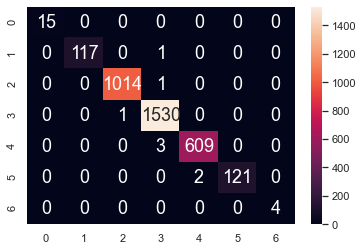

In [27]:
y_train_pred = rforest.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.64

TPR Test :	 1.0
TNR Test :	 nan

FPR Test :	 nan
FNR Test :	 0.0


<ipython-input-28-dc4d397e895c>:14: RuntimeWarning: invalid value encountered in longlong_scalars
  print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
<ipython-input-28-dc4d397e895c>:17: RuntimeWarning: invalid value encountered in longlong_scalars
  print("FPR Test :\t", (fpTest/(fpTest + tnTest)))


<AxesSubplot:>

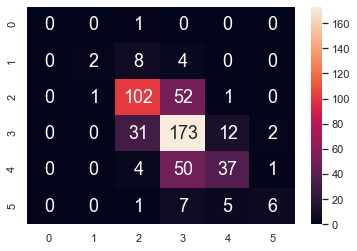

In [28]:
y_test_pred = rforest.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

---

## Evalaution Metrics
Let us have a look at the F1 scores for the model on both test and train data to see how our hyperparameter-tuned model performed

In [29]:
score_test = metrics.f1_score(y_test, y_test_pred, average='macro')
score_train = metrics.f1_score(y_train, y_train_pred, average='macro')

In [30]:
print("F1 score for test : ", score_test)
print("F1 score for train : ", score_train)

F1 score for test :  0.42117369500055246
F1 score for train :  0.9972167833230808


---
## Predict Test Set
Predict on test set and make the submission.

In [31]:
tester = pd.read_csv("test.csv")

In [32]:
submission = rforest.predict(tester)

In [33]:
submission = pd.DataFrame(submission) 
submission.to_csv('submission.csv',header=['quality'],index=False)

In [34]:
submission.head()

,0
0,5
1,5
2,7
3,6
4,6


## Making Direct Submission thought AIcrowd CLI

In [35]:
!pip install -qq aicrowd-cli==0.1

In [36]:
!aicrowd submission create -c wineq -f submission.csv

Traceback (most recent call last):
  File "c:\programdata\anaconda3\lib\site-packages\git\__init__.py", line 87, in <module>
    refresh()
  File "c:\programdata\anaconda3\lib\site-packages\git\__init__.py", line 76, in refresh
    if not Git.refresh(path=path):
  File "c:\programdata\anaconda3\lib\site-packages\git\cmd.py", line 309, in refresh
    raise ImportError(err)
ImportError: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quie